In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('/content/student_data.csv')

In [8]:
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   High school GPA  Number of extracurricular activities  Parental income  \
0              3.8                                     3            45000   
1              3.2                                     1            30000   
2              4.0                                     4            70000   
3              2.8                                     0            25000   
4              3.5                                     2            50000   

   Number of hours studied per week  Performance in an entrance test  \
0                                15                               78   
1                                 8                               65   
2                                20                               90   
3                                 5                               50   
4                                12                               75   

   Distance from college Internet availability at home Final year result  


In [9]:
le_internet = LabelEncoder()
df['Internet availability at home'] = le_internet.fit_transform(df['Internet availability at home'])


In [10]:
le_grade = LabelEncoder()
df['Final year result'] = le_grade.fit_transform(df['Final year result'])

In [11]:
X = df.drop('Final year result', axis=1)
y = df['Final year result']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [14]:
y_pred = model.predict(X_test)

In [15]:
print("\nModel Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Model Accuracy: 0.5

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1
           2       0.50      1.00      0.67         1
           3       0.00      0.00      0.00         1

    accuracy                           0.50         4
   macro avg       0.25      0.50      0.33         4
weighted avg       0.25      0.50      0.33         4



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


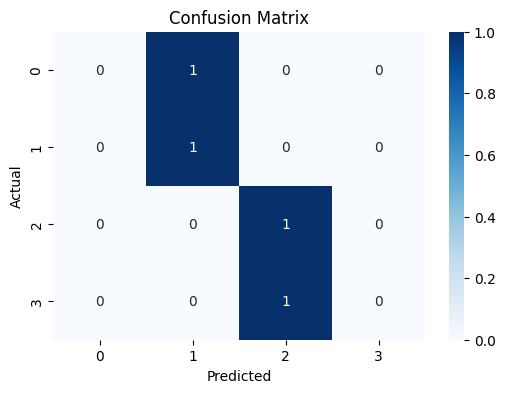

In [16]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [17]:
decoded_predictions = le_grade.inverse_transform(y_pred)
print("\nSample Predicted Grades (Decoded):", decoded_predictions[:5])


Sample Predicted Grades (Decoded): ['B' 'C' 'C' 'B']
